<a href="https://colab.research.google.com/github/Somnadh02/Sepsis-prediction/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/Somnadh02/Sepsis-prediction/blob/main/sepsis_Data2.csv

--2024-11-16 04:10:47--  https://github.com/Somnadh02/Sepsis-prediction/blob/main/sepsis_Data2.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘sepsis_Data2.csv’

sepsis_Data2.csv        [ <=>                ] 162.69K  --.-KB/s    in 0.05s   

2024-11-16 04:10:47 (3.31 MB/s) - ‘sepsis_Data2.csv’ saved [166596]



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv("https://raw.githubusercontent.com/Somnadh02/Sepsis-prediction/refs/heads/main/sepsis_Data2.csv")
dataset=dataset.drop("Unnamed: 0",axis=1)
dataset.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,61.0,99.0,36.44,124.0,65.0,43.0,17.5,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,2,0
1,64.0,98.0,36.44,125.0,64.0,41.0,27.0,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,3,0
2,56.0,100.0,36.44,123.0,65.0,41.0,9.0,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,4,0
3,66.0,99.0,36.22,120.0,67.0,43.0,23.0,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,5,0
4,94.0,100.0,36.22,194.0,116.0,66.0,14.0,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,6,0


In [4]:
dataset.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [5]:
from sklearn.utils import resample
df_majority = dataset[dataset.SepsisLabel==0]
df_minority = dataset[dataset.SepsisLabel==1]

In [6]:
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=57070,    # to match majority class
                                 random_state=123) # reproducible results

In [7]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [8]:
df_upsampled.SepsisLabel.value_counts()

,count
SepsisLabel,
0,57070
1,57070


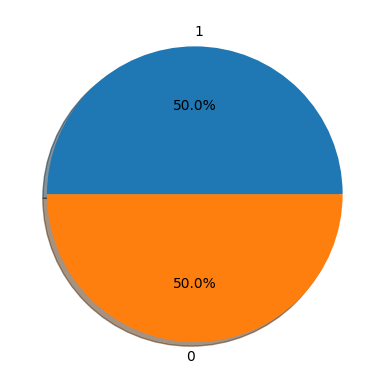

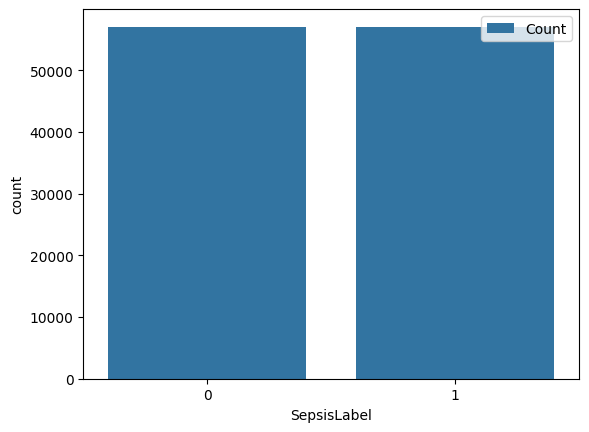

In [9]:
plt.pie(df_upsampled['SepsisLabel'].value_counts(), labels=['1','0'], autopct='%1.1f%%', shadow=True)
plt.show()
sns.countplot(x=df_upsampled['SepsisLabel'], label="Count")
plt.show()

In [10]:
cols = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'FiO2', 'Glucose', 'Age', 'Gender', 'Unit1', 'Unit2', 'ICULOS', 'SepsisLabel']
df = df_upsampled[cols]

In [11]:
X = df[df.columns[0:14]].values

In [12]:
Y = df[df.columns[14:]].values


In [13]:
print("sepsis dimensions : {}".format(df.shape))

sepsis dimensions : (114140, 15)


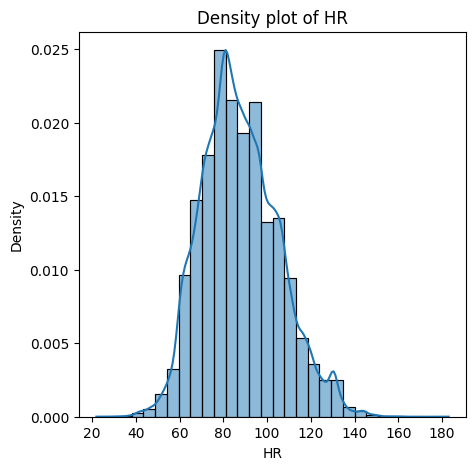

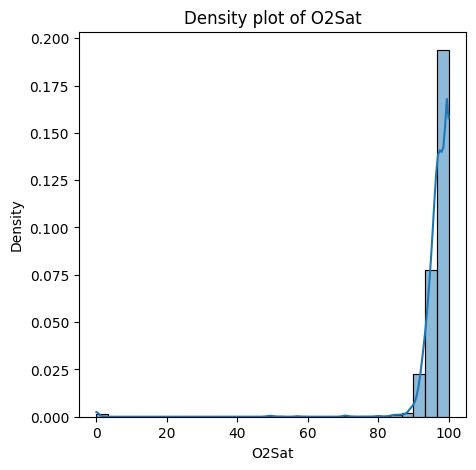

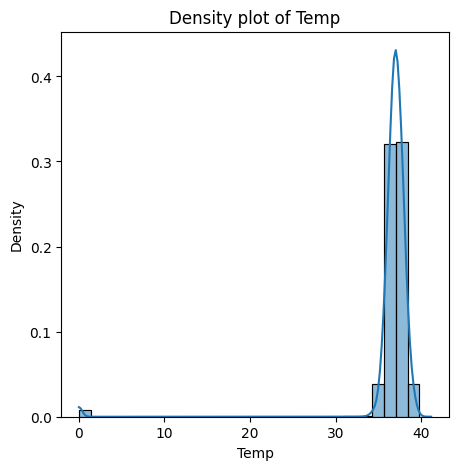

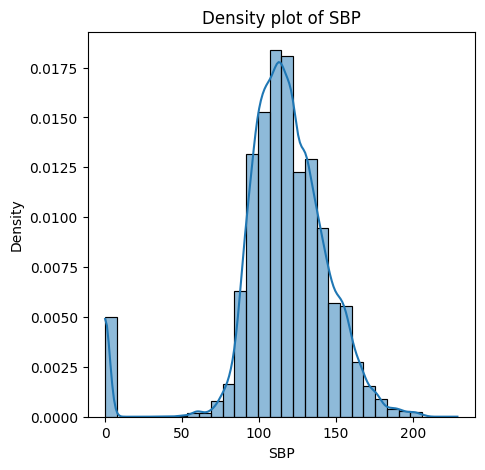

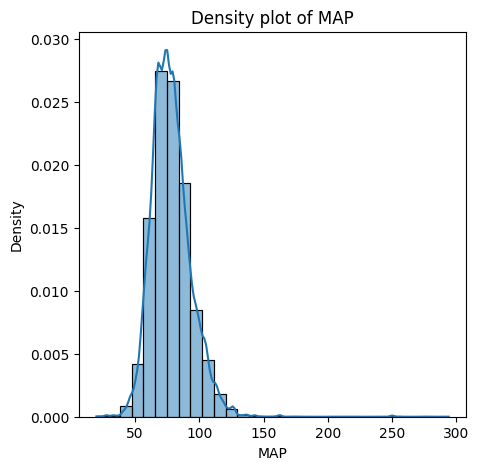

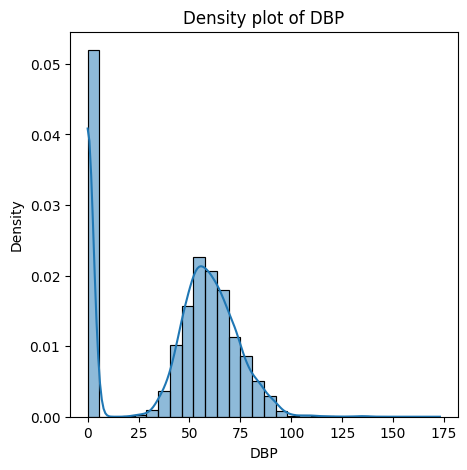

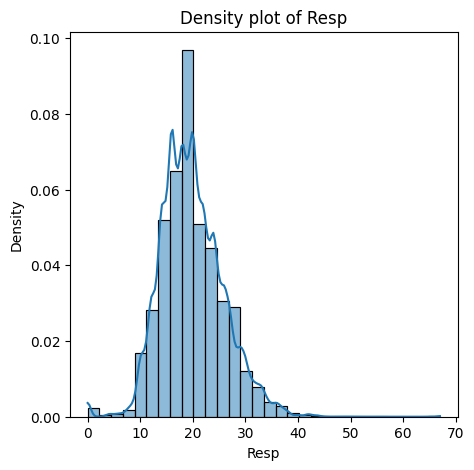

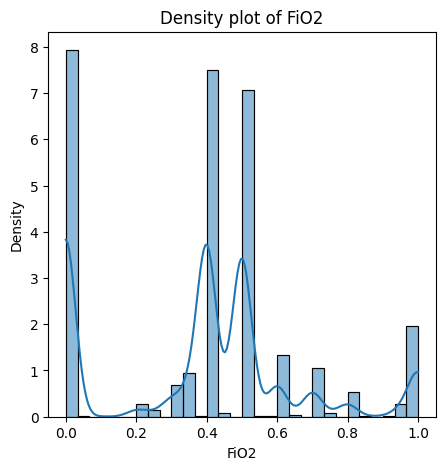

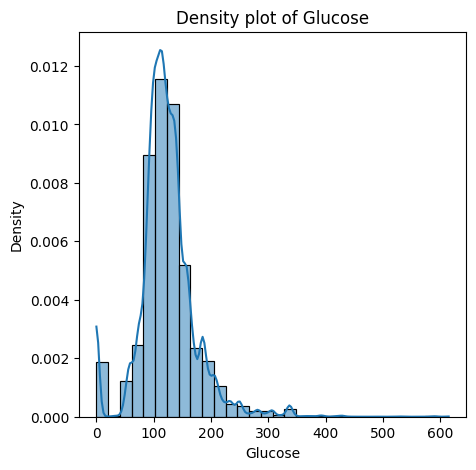

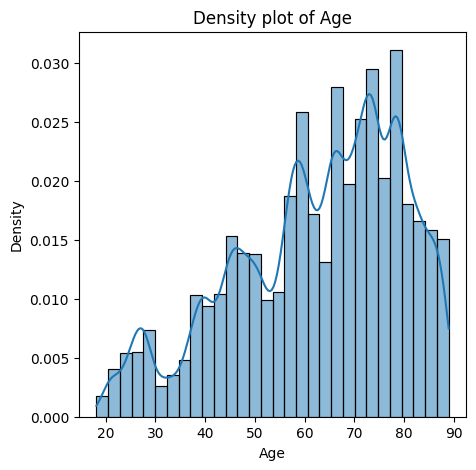

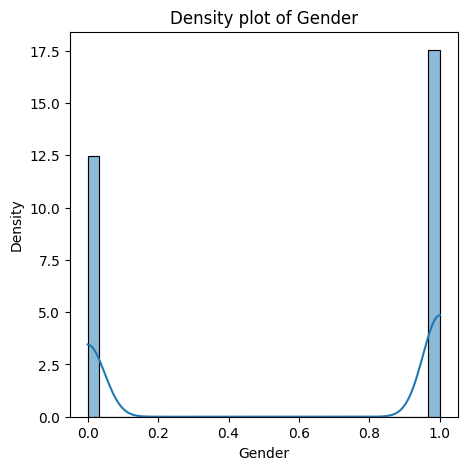

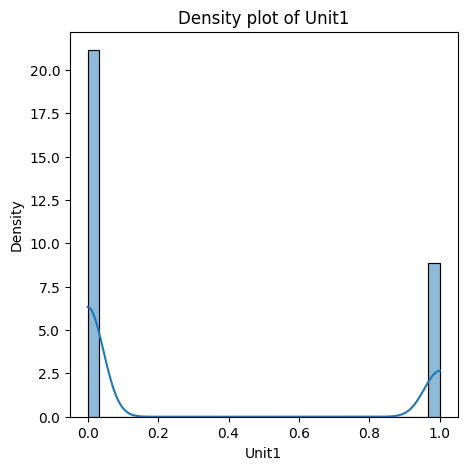

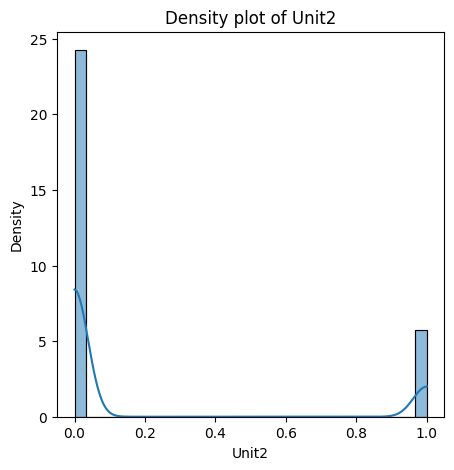

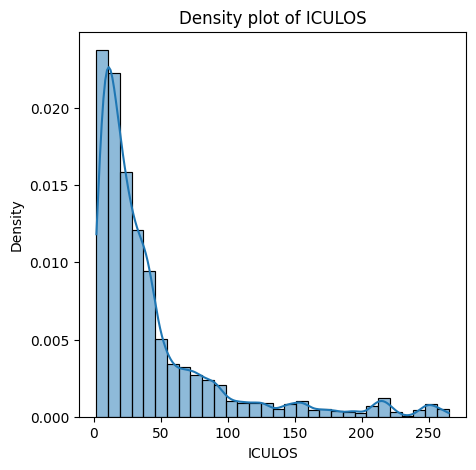

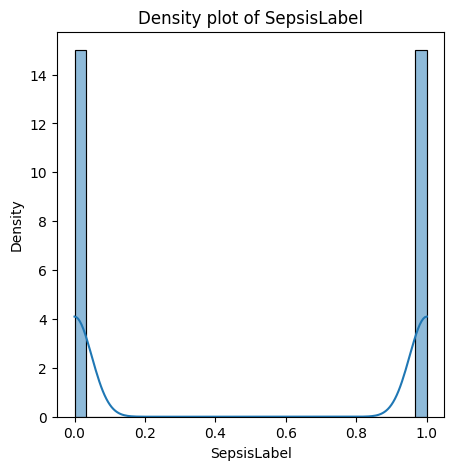

In [14]:
plt.rcParams['figure.figsize'] = (5, 5)
for i, var in enumerate(cols):
    plt.figure(i)
    plt.title("Density plot of " + str(var))
    sns.histplot(data=df,x=var, stat="density", bins=30, kde=True)
    plt.show()

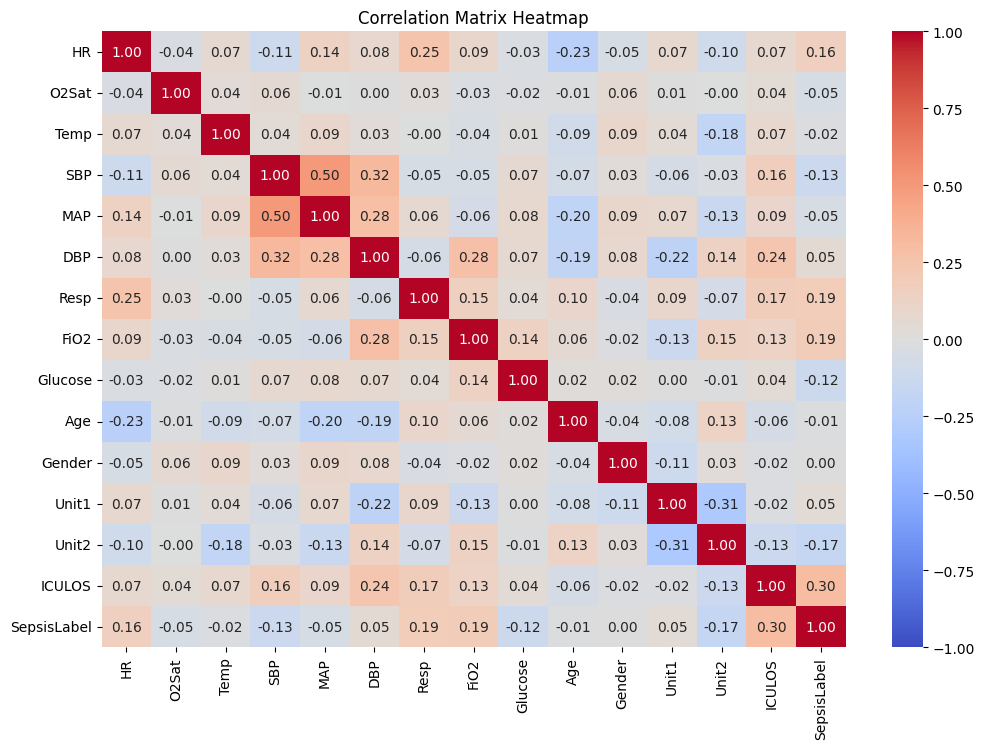

In [16]:

correlation_matrix = df.corr()
+
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()
